In [26]:
import matplotlib.pyplot as plt
import numpy as np


from methods import node_wise_interpolation

In [27]:
num_donors = 5
num_targets = 5
x_low = 0
x_high = 10

donor_x = np.linspace(x_low, x_high, num_donors)
donor_values = np.random.uniform(x_low, x_high, num_donors)
donor_mesh = np.array([donor_x, donor_values], dtype=np.float32)

target_x = np.sort(np.random.uniform(x_low, x_high, num_targets))
target_values = np.zeros_like(target_x)
target_mesh = np.array([target_x, target_values], dtype=np.float32)

In [28]:

linear_func_basis = [0] * num_donors

for j in range(num_donors-1):
    k = (donor_mesh[1][j+1]-donor_mesh[1][j]) / (donor_mesh[0][j+1]-donor_mesh[0][j])
    b = donor_mesh[1][j]
    linear_func_basis[j] = lambda x: k*x+b

linear_func_basis[-1] = lambda x: 0.0

In [29]:
print(linear_func_basis[0](0))

4.047065258026123


In [30]:
result_mesh = node_wise_interpolation(donor_mesh, linear_func_basis, target_x)

0 0
1 1
2 1
3 2
4 3


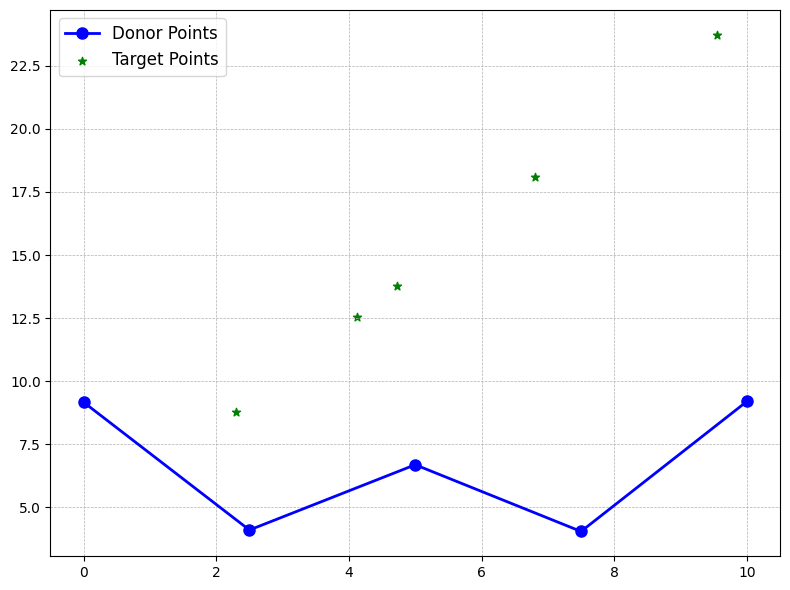

In [31]:
plt.figure(figsize=(8, 6))

# Plot the points connected with lines
plt.plot(donor_mesh[0], donor_mesh[1], marker='o', linestyle='-', color='b', markersize=8, linewidth=2, label='Donor Points')
plt.scatter(result_mesh[0], result_mesh[1], marker='*', color='g', label='Target Points')

# Add grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add a legend
plt.legend(fontsize=12)

# Adjust layout for better fit
plt.tight_layout()

# Show the plot
plt.show()